[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Dogs_Vs_Cats_Redux.ipynb)

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [2]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  7 18:31 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge         15           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11288            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5481            True  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2605            True  


In [6]:
!kaggle competitions list -s dogs

ref                                 deadline             category       reward  teamCount  userHasEntered  
----------------------------------  -------------------  ----------  ---------  ---------  --------------  
dogs-vs-cats                        2014-02-01 23:59:00  Playground       Swag        215            True  
dogs-vs-cats-redux-kernels-edition  2017-03-02 23:59:00  Playground  Knowledge       1314            True  
dog-breed-identification            2018-02-26 23:59:00  Playground      Kudos       1286            True  
seizure-prediction                  2014-11-17 23:59:00  Research      $25,000        504           False  


In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition 

test.zip: Downloaded 271MB of 271MB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition
train.zip: Downloaded 544MB of 544MB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition
sample_submission.csv: Downloaded 111KB of 111KB to /content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition


In [8]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train.zip



In [0]:
import zipfile
zip_ref = zipfile.ZipFile("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip", "r")
zip_ref.extractall("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition")
zip_ref.close()

In [10]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train
train.zip



In [0]:
import os, shutil

In [0]:
original_dataset_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'

In [0]:
base_dir = '../content/.kaggle/competitions/dogs-vs-cats'                 
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')                                
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')                      
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')                                  
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)   

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

test_cats_dir = os.path.join(test_dir, 'cats')                             
os.mkdir(test_cats_dir)                                                    

test_dogs_dir = os.path.join(test_dir, 'dogs')                             
os.mkdir(test_dogs_dir) 

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)      

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)                                              


In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              


In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst)                                              

In [21]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [22]:
import keras
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator



In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen= ImageDataGenerator(rescale = 1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [30]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=10,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/10
100/100 [==============================] - 13s 129ms/step - loss: 0.6912 - acc: 0.5320 - val_loss: 0.6745 - val_acc: 0.6070
Epoch 2/10
100/100 [==============================] - 11s 105ms/step - loss: 0.6666 - acc: 0.5955 - val_loss: 0.6508 - val_acc: 0.6230
Epoch 3/10
100/100 [==============================] - 10s 105ms/step - loss: 0.6317 - acc: 0.6465 - val_loss: 0.6489 - val_acc: 0.6010
Epoch 4/10
 76/100 [=====================>........] - ETA: 1s - loss: 0.5968 - acc: 0.6961

100/100 [==============================] - 10s 105ms/step - loss: 0.5933 - acc: 0.6945 - val_loss: 0.6895 - val_acc: 0.5780
Epoch 5/10
100/100 [==============================] - 11s 105ms/step - loss: 0.5516 - acc: 0.7185 - val_loss: 0.5942 - val_acc: 0.6730
Epoch 6/10
100/100 [==============================] - 11s 105ms/step - loss: 0.5174 - acc: 0.7340 - val_loss: 0.6002 - val_acc: 0.6850
Epoch 7/10
100/100 [==============================] - 10s 105ms/step - loss: 0.4833 - acc: 0.7655 - val_loss: 0.6230 - val_acc: 0.6560
Epoch 8/10
  1/100 [..............................] - ETA: 4s - loss: 0.4589 - acc: 0.8500

100/100 [==============================] - 10s 104ms/step - loss: 0.4502 - acc: 0.7935 - val_loss: 0.6455 - val_acc: 0.6820
Epoch 9/10
100/100 [==============================] - 10s 104ms/step - loss: 0.4283 - acc: 0.7980 - val_loss: 0.5574 - val_acc: 0.7120
Epoch 10/10
100/100 [==============================] - 10s 103ms/step - loss: 0.3988 - acc: 0.8145 - val_loss: 0.5786 - val_acc: 0.7010


In [0]:
model.save('dogs_and_cats_small_1.h5')

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

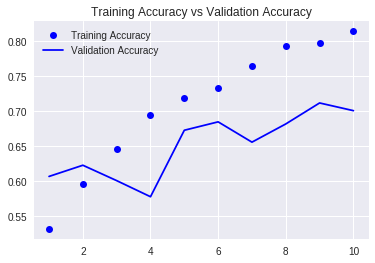

In [34]:
epochs= range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

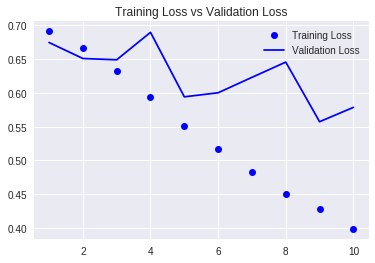

In [35]:
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

In [0]:
# Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

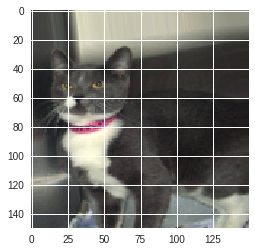

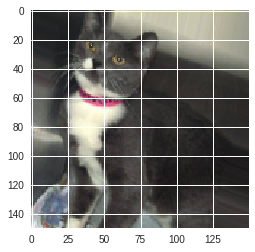

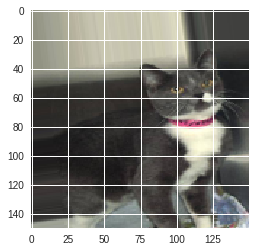

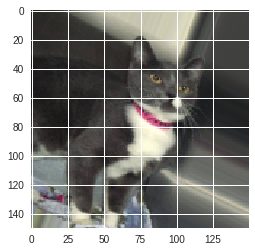

In [37]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[10]  

img = image.load_img(img_path, target_size=(150, 150))  

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 34s 344ms/step - loss: 0.6852 - acc: 0.5469 - val_loss: 0.6888 - val_acc: 0.5152
Epoch 2/10
100/100 [==============================] - 32s 317ms/step - loss: 0.6686 - acc: 0.5706 - val_loss: 0.6451 - val_acc: 0.6085
Epoch 3/10
100/100 [==============================] - 31s 310ms/step - loss: 0.6515 - acc: 0.6009 - val_loss: 0.6357 - val_acc: 0.6136
Epoch 4/10
 64/100 [==================>...........] - ETA: 8s - loss: 0.6319 - acc: 0.6323

100/100 [==============================] - 31s 310ms/step - loss: 0.6247 - acc: 0.6347 - val_loss: 0.5995 - val_acc: 0.6631
Epoch 5/10
100/100 [==============================] - 30s 304ms/step - loss: 0.6071 - acc: 0.6713 - val_loss: 0.6222 - val_acc: 0.6288
Epoch 6/10
100/100 [==============================] - 33s 331ms/step - loss: 0.6081 - acc: 0.6706 - val_loss: 0.6074 - val_acc: 0.6624
Epoch 7/10
 83/100 [=======================>......] - ETA: 4s - loss: 0.5858 - acc: 0.6890

100/100 [==============================] - 31s 312ms/step - loss: 0.5884 - acc: 0.6894 - val_loss: 0.5703 - val_acc: 0.7024
Epoch 8/10
100/100 [==============================] - 32s 316ms/step - loss: 0.5916 - acc: 0.6831 - val_loss: 0.5695 - val_acc: 0.6986
Epoch 9/10
100/100 [==============================] - 32s 316ms/step - loss: 0.5794 - acc: 0.6931 - val_loss: 0.5936 - val_acc: 0.6713
Epoch 10/10
 87/100 [=========================>....] - ETA: 3s - loss: 0.5721 - acc: 0.6979

100/100 [==============================] - 31s 306ms/step - loss: 0.5751 - acc: 0.6988 - val_loss: 0.5419 - val_acc: 0.7145


In [0]:
model.save('cats_and_dogs_small_2.h5')

In [43]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 12s 0us/step


In [44]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '../content/.kaggle/competitions/dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [47]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break                                                           
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [49]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 591us/step - loss: 0.5891 - acc: 0.6835 - val_loss: 0.4553 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 1s 470us/step - loss: 0.4493 - acc: 0.7990 - val_loss: 0.3929 - val_acc: 0.8300
Epoch 3/30
2000/2000 [==============================] - 1s 508us/step - loss: 0.3697 - acc: 0.8485 - val_loss: 0.3695 - val_acc: 0.8330
Epoch 4/30
2000/2000 [==============================] - 1s 507us/step - loss: 0.3351 - acc: 0.8545 - val_loss: 0.3206 - val_acc: 0.8680
Epoch 5/30
2000/2000 [==============================] - 1s 503us/step - loss: 0.3019 - acc: 0.8810 - val_loss: 0.2993 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 1s 499us/step - loss: 0.2802 - acc: 0.8875 - val_loss: 0.2858 - val_acc: 0.8860
Epoch 7/30
2000/2000 [==============================] - 1s 497us/step - loss: 0.2603 - acc: 0.8920 - val_loss: 0.2752 - val_acc: 0.8880


2000/2000 [==============================] - 1s 508us/step - loss: 0.2298 - acc: 0.9075 - val_loss: 0.2632 - val_acc: 0.8920
Epoch 10/30
2000/2000 [==============================] - 1s 507us/step - loss: 0.2136 - acc: 0.9240 - val_loss: 0.2608 - val_acc: 0.8850
Epoch 11/30
2000/2000 [==============================] - 1s 498us/step - loss: 0.2104 - acc: 0.9200 - val_loss: 0.2535 - val_acc: 0.8970
Epoch 12/30
2000/2000 [==============================] - 1s 501us/step - loss: 0.2009 - acc: 0.9305 - val_loss: 0.2501 - val_acc: 0.8980
Epoch 13/30
2000/2000 [==============================] - 1s 499us/step - loss: 0.1941 - acc: 0.9310 - val_loss: 0.2496 - val_acc: 0.8960
Epoch 14/30
2000/2000 [==============================] - 1s 502us/step - loss: 0.1825 - acc: 0.9350 - val_loss: 0.2478 - val_acc: 0.8920
Epoch 15/30
2000/2000 [==============================] - 1s 495us/step - loss: 0.1672 - acc: 0.9405 - val_loss: 0.2443 - val_acc: 0.8970
Epoch 16/30
2000/2000 [==============================

2000/2000 [==============================] - 1s 504us/step - loss: 0.1557 - acc: 0.9460 - val_loss: 0.2476 - val_acc: 0.8950
Epoch 19/30
2000/2000 [==============================] - 1s 496us/step - loss: 0.1476 - acc: 0.9520 - val_loss: 0.2437 - val_acc: 0.8960
Epoch 20/30
2000/2000 [==============================] - 1s 504us/step - loss: 0.1461 - acc: 0.9475 - val_loss: 0.2403 - val_acc: 0.8970
Epoch 21/30
2000/2000 [==============================] - 1s 509us/step - loss: 0.1367 - acc: 0.9500 - val_loss: 0.2388 - val_acc: 0.8970
Epoch 22/30
2000/2000 [==============================] - 1s 498us/step - loss: 0.1326 - acc: 0.9515 - val_loss: 0.2402 - val_acc: 0.8970
Epoch 23/30
2000/2000 [==============================] - 1s 493us/step - loss: 0.1265 - acc: 0.9580 - val_loss: 0.2408 - val_acc: 0.8990
Epoch 24/30
2000/2000 [==============================] - 1s 507us/step - loss: 0.1215 - acc: 0.9600 - val_loss: 0.2399 - val_acc: 0.8980
Epoch 25/30
2000/2000 [==============================

2000/2000 [==============================] - 1s 494us/step - loss: 0.1136 - acc: 0.9635 - val_loss: 0.2461 - val_acc: 0.8940
Epoch 28/30
2000/2000 [==============================] - 1s 503us/step - loss: 0.1073 - acc: 0.9645 - val_loss: 0.2399 - val_acc: 0.9020
Epoch 29/30
2000/2000 [==============================] - 1s 495us/step - loss: 0.1016 - acc: 0.9700 - val_loss: 0.2432 - val_acc: 0.9040
Epoch 30/30
2000/2000 [==============================] - 1s 494us/step - loss: 0.0947 - acc: 0.9720 - val_loss: 0.2425 - val_acc: 0.8980


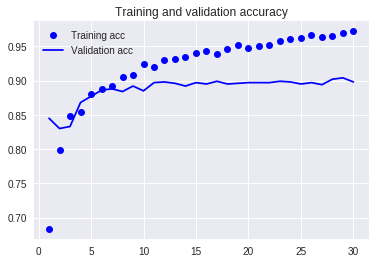

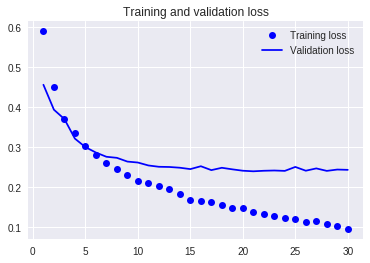

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
 print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [56]:
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255) 

In [59]:
train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(150, 150),                                  
        batch_size=20,
        class_mode='binary')                                     

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


In [61]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 27s 274ms/step - loss: 0.5941 - acc: 0.6830 - val_loss: 0.4463 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 26s 260ms/step - loss: 0.4833 - acc: 0.7785 - val_loss: 0.3692 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 26s 260ms/step - loss: 0.4328 - acc: 0.8100 - val_loss: 0.3480 - val_acc: 0.8500
Epoch 4/30
 63/100 [=================>............] - ETA: 6s - loss: 0.3968 - acc: 0.8294

100/100 [==============================] - 26s 260ms/step - loss: 0.3975 - acc: 0.8265 - val_loss: 0.3132 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3872 - acc: 0.8235 - val_loss: 0.2921 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 26s 260ms/step - loss: 0.3778 - acc: 0.8220 - val_loss: 0.2824 - val_acc: 0.8850
Epoch 7/30
 80/100 [=======================>......] - ETA: 3s - loss: 0.3596 - acc: 0.8419

100/100 [==============================] - 26s 260ms/step - loss: 0.3569 - acc: 0.8405 - val_loss: 0.2747 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3286 - acc: 0.8685 - val_loss: 0.2881 - val_acc: 0.8820
Epoch 9/30
100/100 [==============================] - 26s 260ms/step - loss: 0.3488 - acc: 0.8535 - val_loss: 0.2662 - val_acc: 0.8960
Epoch 10/30
 83/100 [=======================>......] - ETA: 3s - loss: 0.3275 - acc: 0.8602

100/100 [==============================] - 26s 260ms/step - loss: 0.3304 - acc: 0.8575 - val_loss: 0.2610 - val_acc: 0.8940
Epoch 11/30
100/100 [==============================] - 26s 260ms/step - loss: 0.3348 - acc: 0.8475 - val_loss: 0.2568 - val_acc: 0.8990
Epoch 12/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3295 - acc: 0.8625 - val_loss: 0.2491 - val_acc: 0.9030
Epoch 13/30
 83/100 [=======================>......] - ETA: 3s - loss: 0.3409 - acc: 0.8458

100/100 [==============================] - 26s 261ms/step - loss: 0.3394 - acc: 0.8450 - val_loss: 0.2478 - val_acc: 0.9040
Epoch 14/30
100/100 [==============================] - 26s 259ms/step - loss: 0.3172 - acc: 0.8600 - val_loss: 0.2455 - val_acc: 0.9050
Epoch 15/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3175 - acc: 0.8630 - val_loss: 0.2471 - val_acc: 0.8990
Epoch 16/30
 84/100 [========================>.....] - ETA: 3s - loss: 0.3138 - acc: 0.8661

100/100 [==============================] - 26s 260ms/step - loss: 0.3077 - acc: 0.8695 - val_loss: 0.2457 - val_acc: 0.9040
Epoch 17/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3113 - acc: 0.8705 - val_loss: 0.2414 - val_acc: 0.9060
Epoch 18/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3091 - acc: 0.8675 - val_loss: 0.2489 - val_acc: 0.9100
Epoch 19/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.2920 - acc: 0.8835

100/100 [==============================] - 26s 260ms/step - loss: 0.2961 - acc: 0.8795 - val_loss: 0.2583 - val_acc: 0.8920
Epoch 20/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3010 - acc: 0.8745 - val_loss: 0.2420 - val_acc: 0.9030
Epoch 21/30
100/100 [==============================] - 26s 260ms/step - loss: 0.2956 - acc: 0.8755 - val_loss: 0.2390 - val_acc: 0.9110
Epoch 22/30
 83/100 [=======================>......] - ETA: 3s - loss: 0.2912 - acc: 0.8711

100/100 [==============================] - 26s 262ms/step - loss: 0.2903 - acc: 0.8720 - val_loss: 0.2412 - val_acc: 0.9090
Epoch 23/30
100/100 [==============================] - 26s 261ms/step - loss: 0.2941 - acc: 0.8775 - val_loss: 0.2390 - val_acc: 0.9140
Epoch 24/30
100/100 [==============================] - 26s 261ms/step - loss: 0.2937 - acc: 0.8715 - val_loss: 0.2450 - val_acc: 0.9090
Epoch 25/30
 83/100 [=======================>......] - ETA: 3s - loss: 0.3027 - acc: 0.8633

100/100 [==============================] - 26s 263ms/step - loss: 0.2969 - acc: 0.8640 - val_loss: 0.2614 - val_acc: 0.8940
Epoch 26/30
100/100 [==============================] - 27s 265ms/step - loss: 0.2893 - acc: 0.8755 - val_loss: 0.2371 - val_acc: 0.9080
Epoch 27/30
100/100 [==============================] - 26s 262ms/step - loss: 0.2779 - acc: 0.8810 - val_loss: 0.2369 - val_acc: 0.9110
Epoch 28/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.2706 - acc: 0.8853

100/100 [==============================] - 26s 264ms/step - loss: 0.2854 - acc: 0.8780 - val_loss: 0.2363 - val_acc: 0.9130
Epoch 29/30
100/100 [==============================] - 26s 264ms/step - loss: 0.2825 - acc: 0.8800 - val_loss: 0.2372 - val_acc: 0.9040
Epoch 30/30
100/100 [==============================] - 26s 261ms/step - loss: 0.2710 - acc: 0.8790 - val_loss: 0.2396 - val_acc: 0.9140


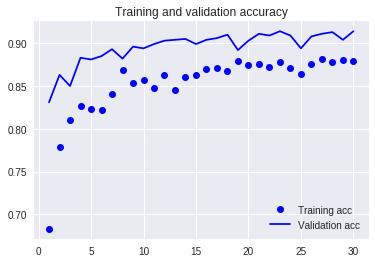

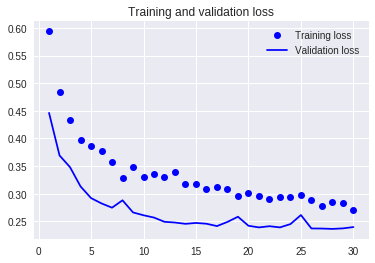

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [63]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [65]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])


In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [71]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 27s 269ms/step - loss: 0.0798 - acc: 0.9660 - val_loss: 0.1950 - val_acc: 0.9390
Epoch 2/20
100/100 [==============================] - 26s 262ms/step - loss: 0.0818 - acc: 0.9675 - val_loss: 0.2349 - val_acc: 0.9290
Epoch 3/20
100/100 [==============================] - 26s 261ms/step - loss: 0.0871 - acc: 0.9675 - val_loss: 0.2023 - val_acc: 0.9350
Epoch 4/20
 64/100 [==================>...........] - ETA: 6s - loss: 0.0739 - acc: 0.9703

100/100 [==============================] - 26s 263ms/step - loss: 0.0756 - acc: 0.9690 - val_loss: 0.1880 - val_acc: 0.9370
Epoch 5/20
100/100 [==============================] - 26s 263ms/step - loss: 0.0868 - acc: 0.9630 - val_loss: 0.2002 - val_acc: 0.9370
Epoch 6/20
100/100 [==============================] - 26s 263ms/step - loss: 0.0723 - acc: 0.9735 - val_loss: 0.2075 - val_acc: 0.9350
Epoch 7/20
 83/100 [=======================>......] - ETA: 3s - loss: 0.0795 - acc: 0.9681

100/100 [==============================] - 26s 263ms/step - loss: 0.0812 - acc: 0.9665 - val_loss: 0.1983 - val_acc: 0.9460
Epoch 8/20
100/100 [==============================] - 26s 263ms/step - loss: 0.0695 - acc: 0.9740 - val_loss: 0.1957 - val_acc: 0.9360
Epoch 9/20
100/100 [==============================] - 27s 265ms/step - loss: 0.0645 - acc: 0.9770 - val_loss: 0.1928 - val_acc: 0.9370
Epoch 10/20
 86/100 [========================>.....] - ETA: 2s - loss: 0.0662 - acc: 0.9715

100/100 [==============================] - 27s 265ms/step - loss: 0.0667 - acc: 0.9710 - val_loss: 0.1903 - val_acc: 0.9420
Epoch 11/20
100/100 [==============================] - 27s 266ms/step - loss: 0.0598 - acc: 0.9750 - val_loss: 0.1981 - val_acc: 0.9370
Epoch 12/20
100/100 [==============================] - 26s 264ms/step - loss: 0.0651 - acc: 0.9770 - val_loss: 0.1851 - val_acc: 0.9450
Epoch 13/20
 86/100 [========================>.....] - ETA: 2s - loss: 0.0691 - acc: 0.9762

100/100 [==============================] - 27s 267ms/step - loss: 0.0699 - acc: 0.9750 - val_loss: 0.1950 - val_acc: 0.9400
Epoch 14/20
100/100 [==============================] - 27s 267ms/step - loss: 0.0527 - acc: 0.9800 - val_loss: 0.2152 - val_acc: 0.9310
Epoch 15/20
100/100 [==============================] - 27s 267ms/step - loss: 0.0589 - acc: 0.9790 - val_loss: 0.2279 - val_acc: 0.9310
Epoch 16/20
 86/100 [========================>.....] - ETA: 2s - loss: 0.0501 - acc: 0.9837

100/100 [==============================] - 27s 266ms/step - loss: 0.0506 - acc: 0.9825 - val_loss: 0.2418 - val_acc: 0.9350
Epoch 17/20
100/100 [==============================] - 27s 266ms/step - loss: 0.0515 - acc: 0.9790 - val_loss: 0.2174 - val_acc: 0.9340
Epoch 18/20
100/100 [==============================] - 26s 265ms/step - loss: 0.0537 - acc: 0.9780 - val_loss: 0.2592 - val_acc: 0.9290
Epoch 19/20
 84/100 [========================>.....] - ETA: 3s - loss: 0.0487 - acc: 0.9821

100/100 [==============================] - 26s 264ms/step - loss: 0.0466 - acc: 0.9825 - val_loss: 0.3759 - val_acc: 0.9100
Epoch 20/20
100/100 [==============================] - 26s 264ms/step - loss: 0.0606 - acc: 0.9780 - val_loss: 0.2308 - val_acc: 0.9340


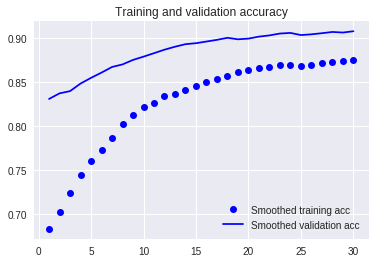

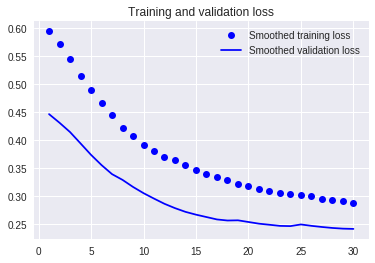

In [72]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9399999940395355
